In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install pandas folium


In [ ]:
import folium
from folium.plugins import HeatMap


/tmp/ipython-input-4-501984225.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='trip_count', data=trip_counts, palette='viridis')


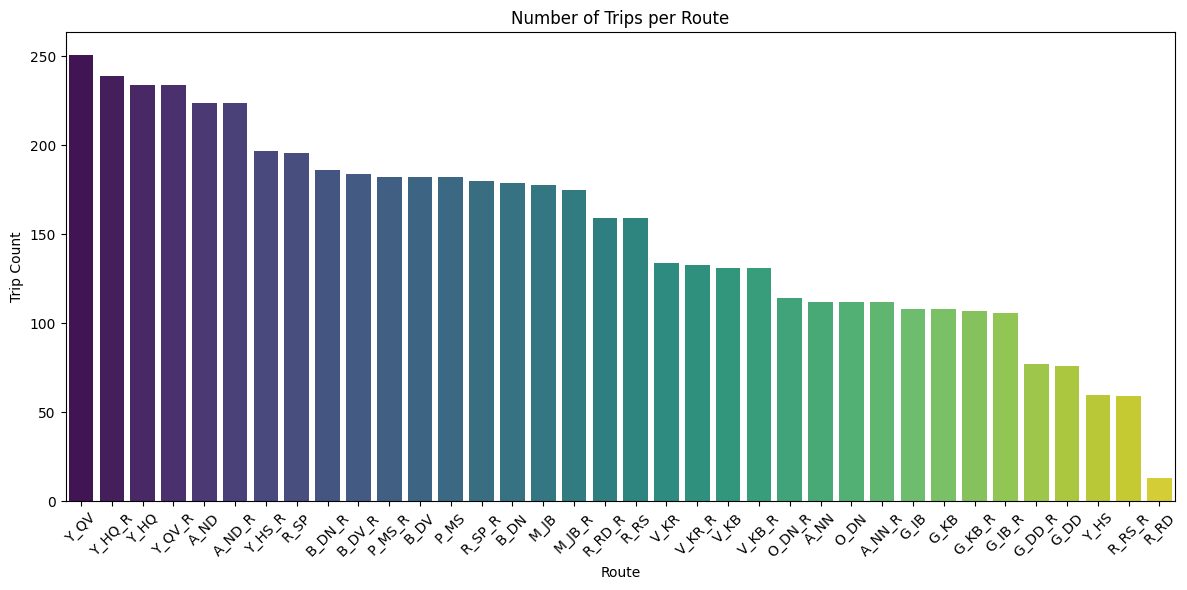

In [ ]:
trips_df = pd.read_csv('/content/trips.txt')
routes_df = pd.read_csv('/content/routes.txt')

trip_counts = trips_df['route_id'].value_counts().reset_index()
trip_counts.columns = ['route_id', 'trip_count']

trip_counts = trip_counts.merge(routes_df[['route_id', 'route_short_name']], on='route_id', how='left')
trip_counts['label'] = trip_counts['route_short_name'].fillna(trip_counts['route_id'])
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='trip_count', data=trip_counts, palette='viridis')
plt.title('Number of Trips per Route')
plt.xlabel('Route')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

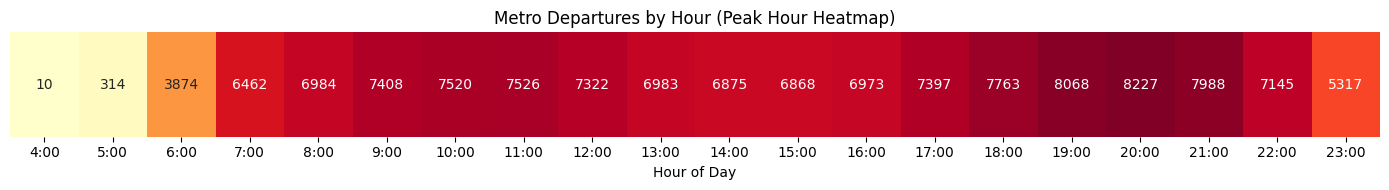

In [ ]:
stop_times = pd.read_csv("/content/stop_times.txt")
stop_times = stop_times[stop_times['departure_time'].str.contains(":", na=False)]
stop_times['hour'] = stop_times['departure_time'].str.split(":").str[0].astype(int)
stop_times = stop_times[stop_times['hour'].between(0, 23)]
hour_counts = stop_times['hour'].value_counts().sort_index()
heatmap_df = pd.DataFrame([hour_counts.values], columns=[f"{h}:00" for h in hour_counts.index])
plt.figure(figsize=(14, 2))
sns.heatmap(heatmap_df, cmap="YlOrRd", annot=True, fmt="d", cbar=False)
plt.title("Metro Departures by Hour (Peak Hour Heatmap)")
plt.yticks([], [])
plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-435217112.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_stops_per_route, x='label', y='num_stops', palette='crest')


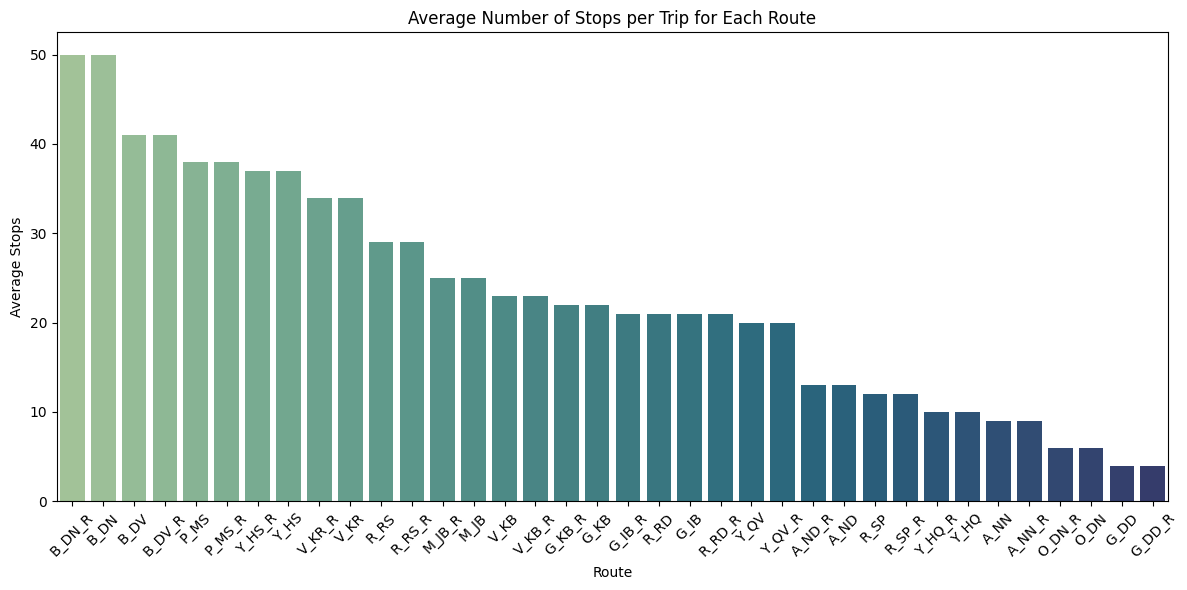

In [ ]:
stop_times = pd.read_csv('/content/stop_times.txt')
trips = pd.read_csv('/content/trips.txt')
routes = pd.read_csv('/content/routes.txt')
stops_per_trip = stop_times.groupby('trip_id').size().reset_index(name='num_stops')
stops_with_route = pd.merge(stops_per_trip, trips[['trip_id', 'route_id']], on='trip_id')
avg_stops_per_route = stops_with_route.groupby('route_id')['num_stops'].mean().reset_index()
avg_stops_per_route = pd.merge(avg_stops_per_route, routes[['route_id', 'route_short_name']], on='route_id', how='left')
avg_stops_per_route['label'] = avg_stops_per_route['route_short_name'].fillna(avg_stops_per_route['route_id'])
avg_stops_per_route = avg_stops_per_route.sort_values(by='num_stops', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_stops_per_route, x='label', y='num_stops', palette='crest')
plt.title('Average Number of Stops per Trip for Each Route')
plt.xlabel('Route')
plt.ylabel('Average Stops')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stops = pd.read_csv('/content/stops.txt')
stops = stops.dropna(subset=['stop_lat', 'stop_lon'])
heat_data = stops[['stop_lat', 'stop_lon']].values.tolist()
delhi_map = folium.Map(location=[28.6139, 77.2090], zoom_start=11)
HeatMap(heat_data, radius=10).add_to(delhi_map)



delhi_map

/tmp/ipython-input-4-3353740236.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_transfers, x='stop_name', y='num_routes', palette='mako')


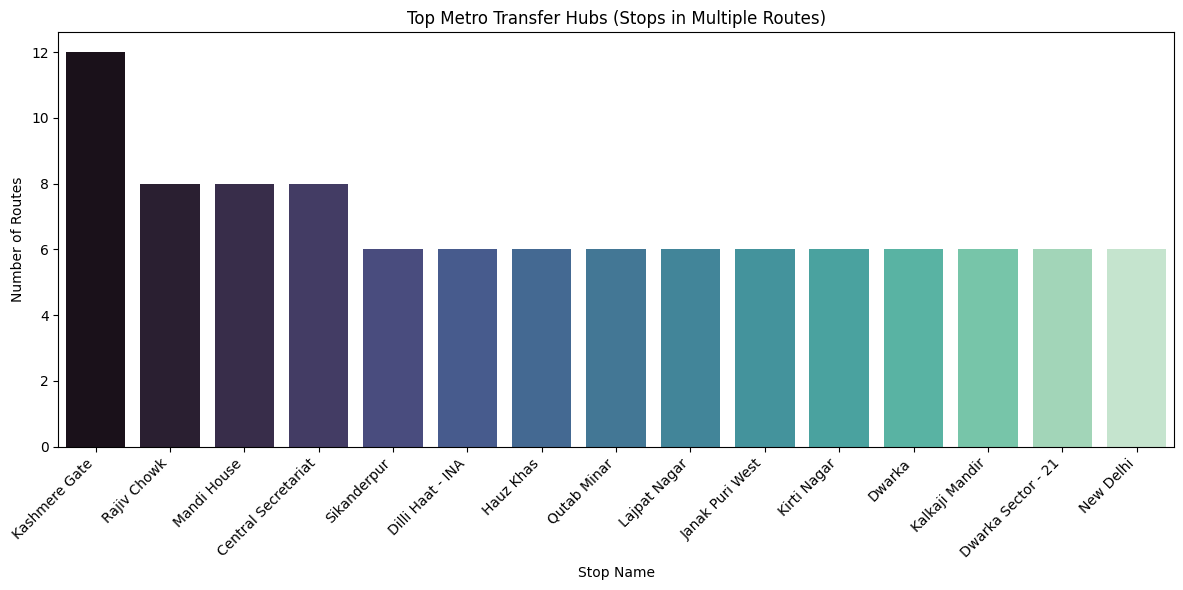

In [4]:
stops = pd.read_csv('/content/stops.txt')
stop_times = pd.read_csv('/content/stop_times.txt')
trips = pd.read_csv('/content/trips.txt')

stop_route = pd.merge(stop_times[['trip_id', 'stop_id']],
                      trips[['trip_id', 'route_id']],
                      on='trip_id',
                      how='left')


stop_route = stop_route.drop_duplicates(subset=['stop_id', 'route_id'])

transfer_counts = stop_route.groupby('stop_id')['route_id'].nunique().reset_index()
transfer_counts.columns = ['stop_id', 'num_routes']


transfer_counts = pd.merge(transfer_counts,
                           stops[['stop_id', 'stop_name']],
                           on='stop_id',
                           how='left')


top_transfers = transfer_counts.sort_values(by='num_routes', ascending=False).head(15)


plt.figure(figsize=(12,6))
sns.barplot(data=top_transfers, x='stop_name', y='num_routes', palette='mako')
plt.title('Top Metro Transfer Hubs (Stops in Multiple Routes)')
plt.xlabel('Stop Name')
plt.ylabel('Number of Routes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
